In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Y=β0+β1X
def linear(X, b0, b1):
    return [b0 + b1 * x for x in X]

In [3]:
# β0=ydash−β1xdash is the intercept
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)
    return y_ - b1 * x_

In [4]:
# β1=sigma(rise)/sigma(run)
def slope(X, Y):
    x_ = np.mean(X)
    y_ = np.mean(Y)
    rise = sum([(x - x_) * (y - y_) for x, y in zip(X, Y)])
    run = sum([(x - x_) ** 2 for x, y in zip(X, Y)])
    return rise / run

In [6]:
# Read and view data
data = pd.read_csv(r"C:\Users\gando\Desktop\linear-regression-scratch\automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [7]:
# Statistical description of data
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000
mean,0.725000,98.303125,172.510000,65.613125,53.900625,2465.450000,119.487500,3.299937,3.237062,10.155125,96.21250,5114.375000,26.475000,32.031250,11472.631250
std,1.197219,5.174677,11.551107,1.943029,2.261671,483.509117,30.543914,0.266504,0.294096,3.877969,30.98902,464.337883,6.106961,6.470467,5869.215883
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.00000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.675000,64.000000,52.375000,2073.250000,97.000000,3.050000,3.107500,8.700000,69.00000,4800.000000,23.000000,28.000000,7383.500000
50%,1.000000,96.950000,172.400000,65.400000,54.100000,2352.500000,110.000000,3.270000,3.270000,9.000000,88.00000,5200.000000,26.000000,32.000000,9245.500000
75%,2.000000,101.200000,177.975000,66.500000,55.500000,2814.250000,136.000000,3.550000,3.410000,9.400000,114.00000,5500.000000,31.000000,37.000000,15157.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.00000,6600.000000,49.000000,54.000000,35056.000000


In [8]:
# Find dataset size
print("Total {} Rows & {} Columns".format(data.shape[0], data.shape[1]))

Total 160 Rows & 26 Columns


In [9]:
# View datatypes
pd.DataFrame(data.dtypes)
# pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [10]:
# Replace non-numeric values with NaN in 'price' column
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [11]:
# Drop rows with NaN values in the 'price' column
data = data.dropna(subset=['price'])

In [12]:
# Convert 'price' column to integer type
data['price'] = data['price'].astype(int)

In [13]:
# Exclude non-numeric columns from correlation computation
numeric_data = data.select_dtypes(include=[np.number])

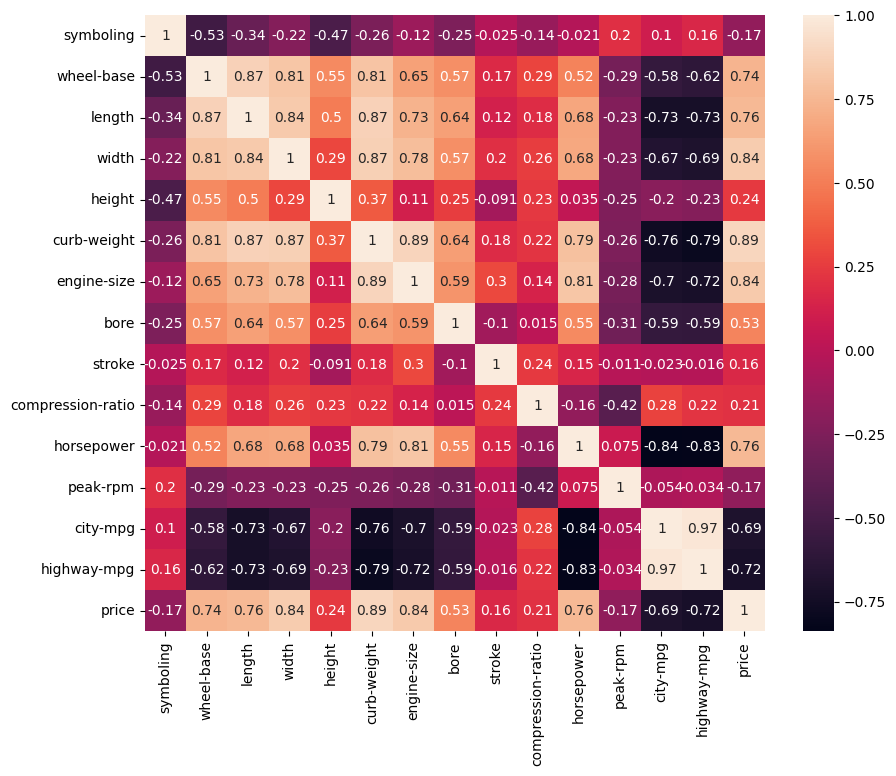

In [14]:
# Correlation matrix to decide which variables to use
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [16]:
# View thhe count
numeric_data['price'].value_counts()

price
7957     2
7898     2
6692     2
6229     2
8845     2
        ..
6189     1
5389     1
35056    1
31600    1
22625    1
Name: count, Length: 146, dtype: int64

In [19]:
# Define target and predictor variables
final_data = numeric_data[['engine-size', 'price']]
predictor = numeric_data['engine-size']
target = numeric_data['price']

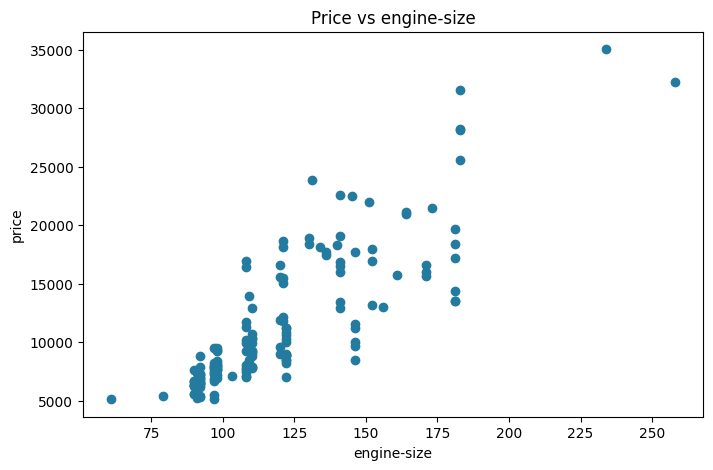

In [21]:
# Plot for the final data
plt.figure(figsize=(8,5))
plt.title("Price vs engine-size")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

In [22]:
# Compute values for b1. b0, and predicted
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
# print(predicted)

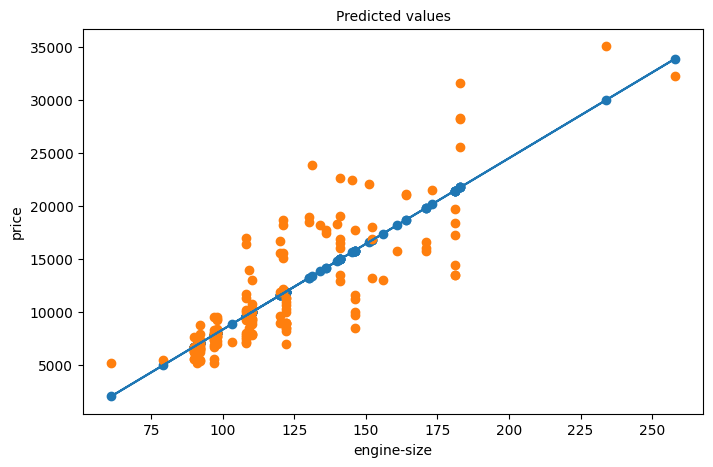

In [23]:
# Draw the best fit line
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted)
plt.scatter(predictor, predicted)
plt.title('Predicted values', fontsize = 10)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target)
plt.show()

In [26]:
# Display the coefficients
print("Coefficients:")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  -7846.727455780698
b1 :  161.68518636493943


In [27]:
# Calculate r2 value
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
    
# ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y, y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])
    
    r_sqr = 1 - (sse / sst)
    
    return r_sqr

In [32]:
r_squared(target, predicted)

0.7079941367981708

In [31]:
# Calculate regression using sklearn for verification and comparison
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.7079941367981708
